## Análisis Exploratorio de Datos (EDA)

En esta fase, exploraremos el conjunto de datos para entender su estructura, identificar problemas comunes (valores nulos, inconsistencias, etc.) y obtener insights iniciales.

1. Importar librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

2. Este código descarga el dataset "Breast Cancer" de Kaggle, subido por el usuario "reihanenamdari", y luego imprime la ubicación de los archivos descargados en tu computadora.

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("reihanenamdari/breast-cancer")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\InvitadoLaptop\.cache\kagglehub\datasets\reihanenamdari\breast-cancer\versions\1


3. Cargar el archivo CSV en un DataFrame y explorarlo.

In [4]:
df_dataSet = pd.read_csv("breast_cancer.csv")

df_dataSet.sample(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
2058,63,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Distant,80,Positive,Positive,22,18,98,Alive
2520,53,Other,Married,T2,N1,IIB,Moderately differentiated,2,Regional,29,Positive,Positive,10,2,70,Alive
2868,48,White,Married,T1,N1,IIA,Well differentiated,1,Regional,12,Positive,Positive,8,1,49,Alive


4. Usamos "shape" para obtener las dimensiones del DataFrame.

In [5]:
df_dataSet.shape

(4024, 16)

5. Ver las ultimas filas del DataFrame.

In [6]:
df_dataSet.tail(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


6. Información general del DataFrame
Usamos el método '.info()' para obtener un resumen del DataFrame, incluyendo el número de filas, columnas y tipos de datos.

In [7]:
df_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

7. Estadística númerica.

In [8]:
df_dataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


8. Estadística númerica.

In [9]:
df_dataSet.describe(include = "object").T

,count,unique,top,freq
Race,4024,3,White,3413
Marital Status,4024,5,Married,2643
T Stage,4024,4,T2,1786
N Stage,4024,3,N1,2732
6th Stage,4024,5,IIA,1305
differentiate,4024,4,Moderately differentiated,2351
Grade,4024,4,2,2351
A Stage,4024,2,Regional,3932
Estrogen Status,4024,2,Positive,3755
Progesterone Status,4024,2,Positive,3326


9. Verificamos si hay valores nulos en el dataframe.

In [10]:
df_dataSet.isna().sum()/df_dataSet.shape[0]*100

Age                       0.0
Race                      0.0
Marital Status            0.0
T Stage                   0.0
N Stage                   0.0
6th Stage                 0.0
differentiate             0.0
Grade                     0.0
A Stage                   0.0
Tumor Size                0.0
Estrogen Status           0.0
Progesterone Status       0.0
Regional Node Examined    0.0
Reginol Node Positive     0.0
Survival Months           0.0
Status                    0.0
dtype: float64

10. Verificamos si hay filas duplicadas.

In [11]:
df_dataSet.duplicated().sum()

1

In [12]:
df_dataSet[df_dataSet.duplicated(keep= False)]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


👆 no se asume como duplicado porque es viable que existan dos mujeres que puedan tener las mismas caracteristicas 

#### Revisar columnas

1. "Age"

In [27]:
df_dataSet["Age"].unique()

array([68, 50, 58, 47, 51, 40, 69, 46, 65, 48, 62, 61, 56, 43, 60, 57, 55,
       63, 66, 53, 59, 54, 49, 64, 42, 37, 67, 31, 52, 33, 45, 38, 39, 36,
       41, 44, 32, 34, 35, 30], dtype=int64)

2. "Race"

In [25]:
df_dataSet["Race"].unique()

array(['White', 'Black', 'Other'], dtype=object)

3. "Marital Status"

In [28]:
df_dataSet["Marital Status"].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

4. "T Stage"

In [30]:
df_dataSet["T Stage "].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

5. "N Stage"

In [31]:
df_dataSet["N Stage"].unique()

array(['N1', 'N2', 'N3'], dtype=object)

6. "6th Stage"

In [32]:
df_dataSet["6th Stage"].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

7. "differentiate"

In [33]:
df_dataSet["differentiate"].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

8. "Grade"

In [34]:
df_dataSet["Grade"].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

9. "A Stage"

In [35]:
df_dataSet["A Stage"].unique()

array(['Regional', 'Distant'], dtype=object)

10. "Tumor Size"

In [36]:
df_dataSet["Tumor Size"].unique()

array([  4,  35,  63,  18,  41,  20,   8,  30, 103,  32,  13,  59,  15,
        19,  46,  24,  25,  29,  40,  70,  22,  50,  17,  21,  10,  27,
        23,   5,  51,   9,  55, 120,  77,   2,  11,  12,  26,  75, 130,
        34,  80,   3,  60,  14,  16,  45,  36,  76,  38,  49,   7,  72,
       100,  43,  62,  37,  68,  52,  85,  57,  39,  28,  48, 110,  65,
         6, 105, 140,  42,  31,  90, 108,  98,  47,  54,  61,  74,  33,
         1,  87,  81,  58, 117,  44, 123, 133,  95, 107,  92,  69,  56,
        82,  66,  78,  97,  88,  53,  83, 101,  84, 115,  73, 125, 104,
        94,  86,  64,  96,  79,  67], dtype=int64)

11. "Estrogen Status"

In [37]:
df_dataSet["Estrogen Status"].unique()

array(['Positive', 'Negative'], dtype=object)

12. "Progesterone Status"

In [38]:
df_dataSet["Progesterone Status"].unique()

array(['Positive', 'Negative'], dtype=object)

13. "Regional Node Examined"

In [39]:
df_dataSet["Regional Node Examined"].unique()

array([24, 14,  2,  3, 18, 11,  9, 20, 21, 13, 23, 16,  1, 22, 15,  4, 26,
       31, 25, 10,  5,  6, 19, 12,  8, 17,  7, 49, 33, 30, 34, 28, 32, 27,
       42, 29, 41, 39, 46, 40, 51, 44, 38, 47, 54, 36, 61, 37, 35, 43, 52,
       45, 57, 60], dtype=int64)

14. "Reginol Node Positive"

In [40]:
df_dataSet["Reginol Node Positive"].unique()

array([ 1,  5,  7,  2, 18, 12,  3, 14, 22, 17, 23,  4, 10,  6,  9,  8, 20,
       16, 13, 11, 24, 27, 21, 26, 15, 28, 19, 29, 31, 46, 33, 37, 30, 35,
       25, 32, 41, 34], dtype=int64)

15. "Survival Months"

In [41]:
df_dataSet["Survival Months"].unique()

array([ 60,  62,  75,  84,  50,  89,  54,  14,  70,  92,  64,  56,  38,
        49, 105, 107,  77,  81,  78, 102,  98,  82,  86,  52,  90,  31,
        37, 103,  42,  61,  63,  39,  59,  71,  74,  73,  91, 106,  80,
        44,  85,  79, 104,  12,  95,  55, 101,  65,  72,  57,  87,  40,
        25,   8,  53,  58,  24,  66,  69,  93,  94, 100,  96,  41,  67,
        51,  13,  11,  47,  23,  45,  68,  76,  15,  16,  99,   7,  48,
        88,  34,  97,  83,  17,   3,  22,  30,   6,  32,   9,   5,  10,
        19,  18,  35,  27,  36,   4,  29,  33,  26,  20,  28,  43,   1,
        46,  21,   2], dtype=int64)

16. "Status"

In [42]:
df_dataSet["Status"].unique()

array(['Alive', 'Dead'], dtype=object)

#### Gráficas de EDA

1. ¿Cuál es la distribución de edades?

<Axes: xlabel='Age', ylabel='Count'>

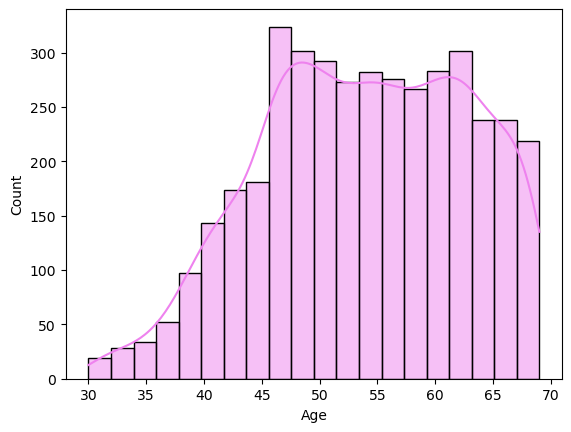

In [15]:
#Histograma de Edad
sns.histplot(df_dataSet['Age'], bins=20, kde=True, color='violet')


Descripción:

El conjunto de datos parece estar sesgado hacia personas de mediana edad y mayores, con un pico alrededor de los 48-50 años.

2. ¿Cuál es la distribución de la edad y cuáles son los valores atípicos en el conjunto de datos?

<Axes: xlabel='Age'>

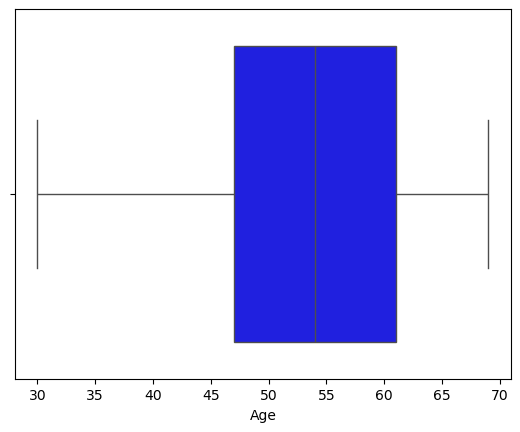

In [19]:
sns.boxplot(x='Age', data=df_dataSet, color='blue')

Descripción:

El conjunto de datos muestra una distribución de edad con una mediana alrededor de los 55 años. El rango intercuartílico (IQR) se extiende aproximadamente desde los 48 hasta los 62 años, lo que indica que la mayoría de los datos se concentran dentro de este rango.  Hay algunos valores atípicos por debajo de los 35 años y por encima de los 70, lo que sugiere la presencia de individuos inusualmente jóvenes y mayores en la muestra, aunque en menor proporción.

3. ¿Cómo se distribuyen las diferentes categorías de 'Grade' a lo largo de las diferentes edades?

<Axes: xlabel='Age', ylabel='Count'>

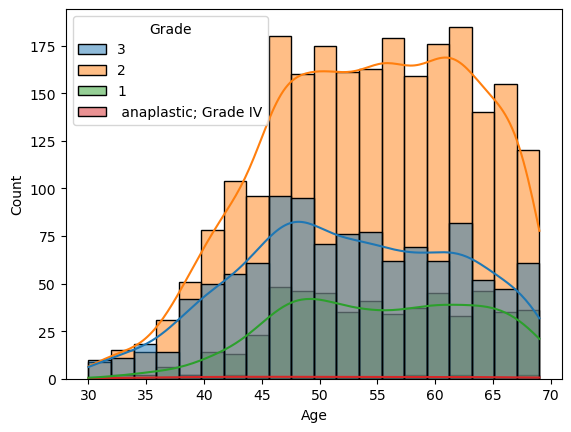

In [20]:
sns.histplot(data= df_dataSet, x= "Age", hue= "Grade", bins=20, kde=True, color='blue')

Descripción:

El gráfico muestra la distribución de diferentes categorías de 'Grade' a lo largo de las edades. Se puede observar que el 'Grade' 2 es el más frecuente en general, especialmente entre las edades de 45 y 60 años. El 'Grade' 3 también es relativamente común, aunque su frecuencia es menor que el 'Grade' 2. Los 'Grades' 1 y 'anaplastic; Grade IV' tienen una frecuencia mucho menor en todas las edades. La distribución de edades es similar para todos los grados, con un pico alrededor de los 50 años.